<a href="https://colab.research.google.com/github/ToBeeeeeee/Adafruit_BusIO/blob/master/Kursovai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Тетуан — город на севере Марокко, занимающий площадь около 10375 км², а его население составляет около 550.374 жителей, согласно последней переписи 2014 года, и быстро увеличивается, примерно на 1,96% в год. Поскольку он расположен вдоль Средиземного моря, его погода мягкая и дождливая зимой, жаркая и сухая в летние месяцы.

Потребление энергии на душу населения в Марокко составляет 0,56 тнэ (примерно на 42% ниже среднего показателя по Северной Африке), включая около 900 кВтч электроэнергии (на 38% ниже среднего показателя по региону) (2020). Рост общего потребления энергии замедлился в период с 2010 по 2019 год (+3%/год по сравнению с 4,5%/год в период 2000-2010 годов) и снизился на 7% в 2020 году до примерно 21 Мтнэ.

Национальное производство углеводородов низкое. Все нефтепродукты импортируются с момента закрытия единственного нефтеперерабатывающего завода страны в 2015 году (200 000 баррелей в день). Импорт нефтепродуктов быстро увеличивался с 2015 по 2019 год (+6% в год) и снизился на 12% в 2020 году из-за кризиса COVID. Данные о потреблении электроэнергии были собраны из Системы диспетчерского управления и сбора данных (SCADA) Amendis, которая является оператором государственных услуг и отвечает за распределение питьевой воды и электроэнергии с 2002 года. Целью распределительной сети электроэнергии является обслуживание потребителей низкого и среднего напряжения в регионах Тетуан. Для этой цели Amendis обеспечивает доставку и распределение электроэнергии от точки доставки до конечного пользователя, клиента. Распределяемая энергия поступает из Национального управления электроэнергии и питьевой воды. После преобразования высокого напряжения (63 кВ) в среднее напряжение (20 кВ) разрешается транспортировать и распределять энергию.

Поскольку потребление электроэнергии имеет решающее значение для страны, идея заключается в изучении влияния на потребление энергии. Набор данных является исчерпывающим в своей демонстрации потребления энергии в городе Тетуан в Марокко. Распределительная сеть питается от 3 зональных станций, а именно: Quads, Smir и Boussafou.

Содержание набора данных
Данные состоят из 52 416 наблюдений потребления энергии в 10-минутном окне.

Каждое наблюдение описывается 9 столбцами признаков.

Дата и время: Временное окно продолжительностью десять минут.

Температура: Погода Температура.

Влажность: Влажность воздуха.

Скорость ветра: Скорость ветра.

Общие диффузные потоки: «Диффузный поток» — это общий термин для описания низкотемпературных (<0,2° до ~100°C) жидкостей, которые медленно разряжаются через сульфидные холмы, трещиноватые потоки лавы и скопления бактериальных матов и макрофауны.

Диффузные потоки

Потребляемая мощность в Зоне 1

Потребляемая мощность в Зоне 2

Потребляемая мощность в Зоне 3

Ссылка на набор данных https://www.kaggle.com/datasets/fedesoriano/electric-power-consumption/data


Прогнозирование потребления электроэнергии с помощью машинного обучения

In [83]:
#импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [84]:
# Задаём имя файла с данными
dataset='powerconsumption.csv'

In [85]:
# Считываем данные из файла в датафрейм (основная структура данных в pandas)
df=pd.read_csv(dataset)

In [86]:
# Смотрим первые 5 строк таблицы, чтобы быстро понять структуру данных
df.head(5)

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [87]:
#просмотрим последние 5 строк
df.tail()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504
52415,12/30/2017 23:50,6.580,74.1,0.081,0.062,0.111,28349.80989,24055.23167,13345.49820


In [88]:
#выведим случайные 5 строк
df.sample(5)

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
42699,10/24/2017 12:30,21.31,71.10,4.921,479.600,335.100,37162.71335,23579.25311,12383.708210
39219,9/30/2017 8:30,16.88,75.20,4.921,190.500,77.400,25378.40708,18205.82121,9496.057201
8416,2/28/2017 10:40,16.91,48.46,0.083,477.400,59.860,32845.42373,19623.10030,15271.236180
43526,10/30/2017 6:20,15.70,86.60,4.914,0.051,0.122,21451.90372,16509.95851,9284.863222
3448,1/24/2017 22:40,7.05,65.58,0.088,0.055,0.100,38418.22785,23846.80851,23040.000000


In [89]:
# Размер датафрейма (число строк и столбцов)
df.shape

(52416, 9)

In [90]:
# Получаем основные статистики по числовым признакам (среднее, std, минимум, максимум и т.д.)
df.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [91]:
# Получаем основные статистики по нечисловым (категориальным, строковым) столбцам
df.describe(include='object')

,Datetime
count,52416
unique,52416
top,12/30/2017 21:10
freq,1


In [92]:
# Получаем расширенные статистики по всем признакам
df.describe(include='all')

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,52416,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
unique,52416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,12/30/2017 21:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,NaN,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,NaN,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,NaN,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,NaN,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,NaN,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420


In [93]:
# Проверяем, есть ли дубликаты строк (повторяющиеся записи)
df.duplicated().sum()

np.int64(0)

(array([   45.,  1929.,  9240.,  7591.,  9513., 10108.,  6552.,  4641.,
         2349.,   448.]),
 array([13895.6962  , 17726.566092, 21557.435984, 25388.305876,
        29219.175768, 33050.04566 , 36880.915552, 40711.785444,
        44542.655336, 48373.525228, 52204.39512 ]),
 <BarContainer object of 10 artists>)

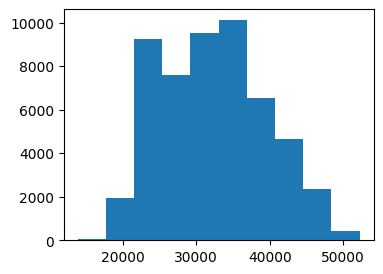

In [94]:
# Строим гистограмму распределения потребления энергии по первой зоне
plt.figure(figsize=(4,3))
plt.hist(df.PowerConsumption_Zone1)


In [95]:

print(df['Datetime'].dtype)


object


In [96]:
# Приводим столбец Datetime к типу даты/времени для удобной работы с временными рядами
df['Datetime'] = pd.to_datetime(df['Datetime'])


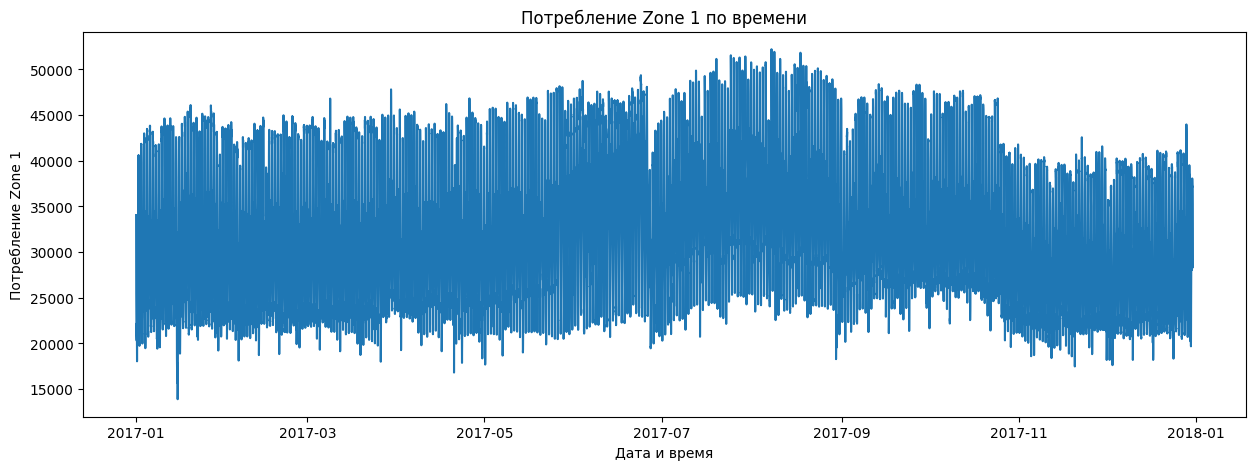

In [97]:
# Строим график временного ряда: потребление Zone 1 по дате и времени
plt.figure(figsize=(15,5))
plt.plot(df['Datetime'], df['PowerConsumption_Zone1'])
plt.xlabel('Дата и время')
plt.ylabel('Потребление Zone 1')
plt.title('Потребление Zone 1 по времени')
plt.show()


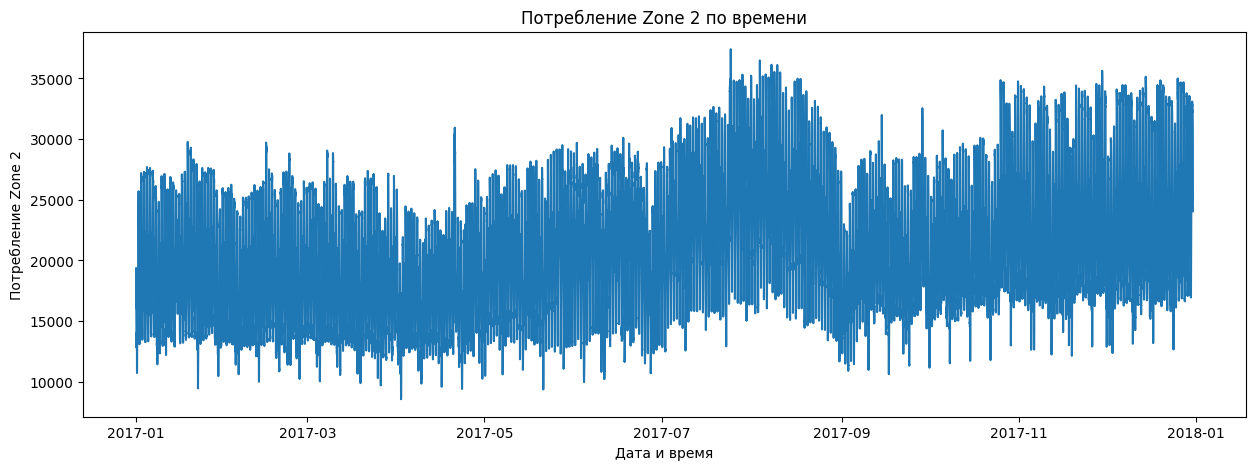

In [98]:
plt.figure(figsize=(15,5))
plt.plot(df['Datetime'], df['PowerConsumption_Zone2'])
plt.xlabel('Дата и время')
plt.ylabel('Потребление Zone 2')
plt.title('Потребление Zone 2 по времени')
plt.show()

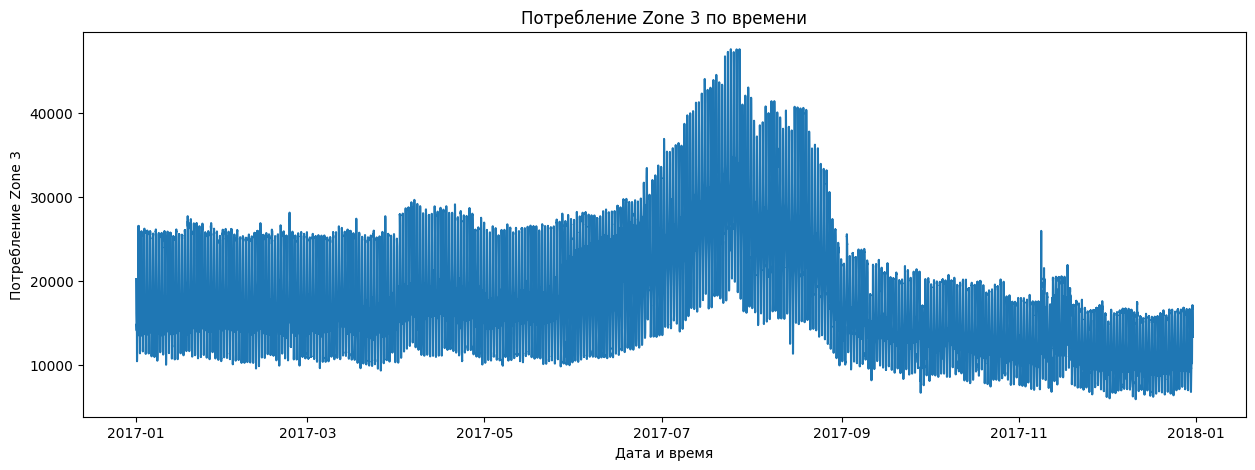

In [99]:
plt.figure(figsize=(15,5))
plt.plot(df['Datetime'], df['PowerConsumption_Zone3'])
plt.xlabel('Дата и время')
plt.ylabel('Потребление Zone 3')
plt.title('Потребление Zone 3 по времени')
plt.show()

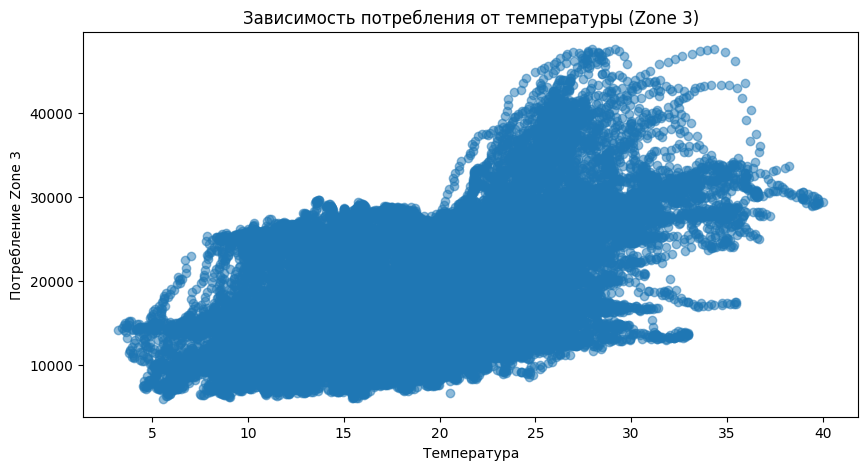

In [100]:
plt.figure(figsize=(10,5))
plt.scatter(df['Temperature'], df['PowerConsumption_Zone3'], alpha=0.5)
plt.xlabel('Температура')
plt.ylabel('Потребление Zone 3')
plt.title('Зависимость потребления от температуры (Zone 3)')
plt.show()


Корреляция

# Коэффициент корреляции

Коэффициент корреляции ($ r_{xy} $) используется для измерения линейной зависимости между двумя количественными признаками $ X $ и $ Y $. Его значение изменяется в диапазоне от $-1$ до $+1$, где:

- $+1$ обозначает идеальную положительную связь,
- $-1$ — идеальную отрицательную связь,
- $0$ — отсутствие линейной связи.

Формула коэффициента корреляции выглядит следующим образом:

$$
r_{xy} = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\sum(x_i - \bar{x})^2}\cdot\sqrt{\sum(y_i - \bar{y})^2}}
$$

Где:
- $ x_i $, $ y_i $ — индивидуальные наблюдения переменных $X$ и $Y$,
- $\bar{x}$, $\bar{y}$ — средние арифметические величины соответствующих наблюдений.

## Интерпретация коэффициента корреляции:

- $|r| > 0.7$: сильная корреляция
- $0.3 < |r| < 0.7$: умеренная корреляция
- $|r| < 0.3$: слабая корреляция

Знак коэффициента показывает направление связи: положительный коэффициент свидетельствует о прямой взаимосвязи, отрицательный — об обратной.

<Axes: >

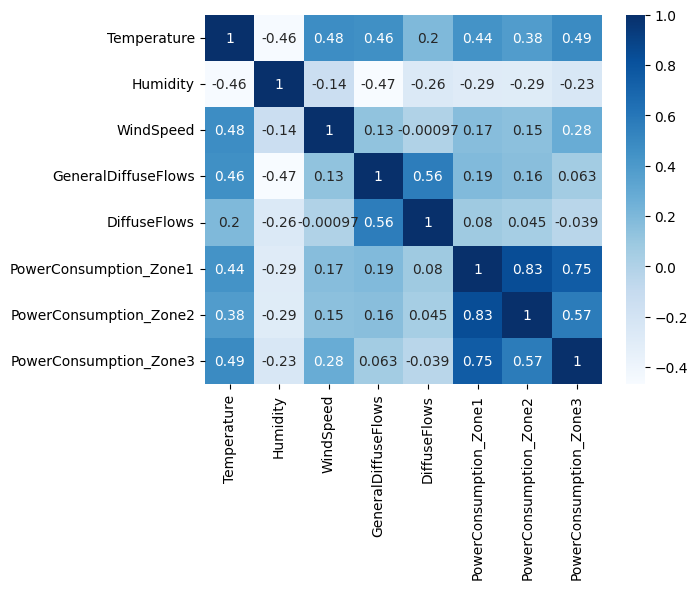

In [101]:
# Строим матрицу корреляций по числовым признакам
cor=df.corr(numeric_only=True)
sns.heatmap(cor, cmap="Blues", annot=True)

Линейная регрессия

Модели машинного обучения - это некоторые математические правила (обычно функции), по которым модель делает прогноз.

**Пример (линейная регрессия):**

$y = a + b\cdot x1 + c\cdot x2,$

здесь $a,b,c$ - параметры модели (заранее мы их не знаем).

*Параметры подбираются по обучающим данным так, чтобы модель ошибалась меньше всего.*

In [102]:
# Выбираем признак, по которому будем строить прогноз (температура)
X=df[['Temperature']]
# Целевая переменная — потребление электроэнергии в первой зоне
y=df['PowerConsumption_Zone1']

In [103]:
# Импортируем класс линейной регрессии из библиотеки sklearn (популярная библиотека для машинного обучения)
from sklearn.linear_model import LinearRegression

In [104]:
# Создаём объект линейной регрессии
lr=LinearRegression()
# Обучаем модель: подбираем коэффициенты для связи температуры и потребления (метод находит оптимальные параметры уравнения прямой)
lr.fit(X,y)
# Делаем предсказания для всех исходных значений X (получаем "прогнозы" модели)
pred=lr.predict(X)

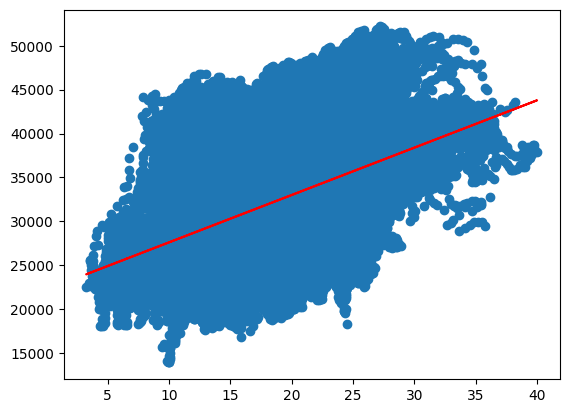

In [105]:
# Строим график исходных данных: точки (температура — фактическое потребление)
plt.scatter(X.values,y)
# Строим линию прогноза (температура — предсказанное потребление, красная линия)
plt.plot(X.values, pred,c='red')

Способы оценить ошибки модели (MAE, MSE, RMSE, MAPE, R^2)
## Ошибки модели и их интерпретация  

> **Обозначения, общие для всех формул**  
> * $l$ — количество наблюдений (размер выборки);  
> * $y_i$ — фактическое значение целевой переменной для объекта $i$;  
> * $\hat{y}_i$ — предсказание модели для объекта $i$;  
> * $\bar{y}$ — среднее значение целевой переменной по выборке.


### MAE — Mean Absolute Error  

$$
MAE \;=\; \frac{1}{l}\sum_{i=1}^{l}\Bigl|\,\hat{y}_i - y_i\,\Bigr|
$$  

* **Интерпретация:** среднее абсолютное отклонение прогноза от факта.  
* **Что показывает:** «на сколько единиц, в среднем, ошибаемся».  
* **Когда полезна:** нужна интуитивно‑понятная метрика, без усиленного штрафа за выбросы.  



### MSE — Mean Squared Error  

$$
MSE \;=\; \frac{1}{l}\sum_{i=1}^{l}\bigl(\hat{y}_i - y_i\bigr)^2
$$  

* **Интерпретация:** средний квадрат ошибки (в «квадратных» единицах).  
* **Что показывает:** сильно «карает» крупные промахи.  
* **Когда полезна:** как функция потерь при обучении, если выбросы критичны.  



### RMSE — Root Mean Squared Error  

$$
RMSE \;=\; \sqrt{\frac{1}{l}\sum_{i=1}^{l}\bigl(\hat{y}_i - y_i\bigr)^2}
$$  

* **Интерпретация:** корень из MSE — возвращает единицы исходной шкалы.  
* **Что показывает:** среднеквадратичную ошибку с акцентом на большие отклонения.  
* **Когда полезна:** нужен усиленный штраф за выбросы и удобная интерпретация.  


### MAPE % — Mean Absolute Percentage Error  

$$
MAPE \;=\; \frac{100}{l}\sum_{i=1}^{l}\left|\frac{\hat{y}_i - y_i}{y_i}\right| \%
$$  

* **Интерпретация:** средняя относительная (процентная) ошибка.  
* **Что показывает:** долю ошибки от реального значения в %.  
* **Когда полезна:** сравниваем модели/датасеты разного масштаба; не применима, если какие‑то \(y_i = 0\).  


### $R^{2}$ — Коэффициент детерминации  

$$
R^{2} \;=\;
1 \;-\;
\frac{\displaystyle\sum_{i=1}^{l}\bigl(\hat{y}_i - y_i\bigr)^2}
     {\displaystyle\sum_{i=1}^{l}\bigl(y_i - \bar{y}\bigr)^2}
$$  

* **Интерпретация:** доля дисперсии \(y\), объяснённая моделью.  
* **Что показывает:**  
  * $R^{2}=1$ — идеальный прогноз,  
  * $R^{2}=0$ — не лучше, чем предсказывать среднее,  
  * $R^{2}<0$ — хуже среднего.  
* **Когда полезна:** быстрый способ сравнить, «насколько модель объясняет вариацию» при одинаковом наборе признаков.



In [106]:
#Импортируем методы оценки ошибок
from sklearn.metrics import(
    mean_absolute_error,
    mean_squared_error,
    r2_score
)

In [107]:
# MAE
mae = mean_absolute_error(y, pred)

# MSE   (без параметра squared)
mse = mean_squared_error(y, pred)

# RMSE  как корень из MSE
rmse = np.sqrt(mse)

# MAPE %
mape = np.mean(np.abs((y - pred) / y)) * 100   # осторожно: y_i ≠ 0

# R²
r2 = r2_score(y, pred)

pd.DataFrame(
    {"MAE": mae, "MSE": mse, "RMSE": rmse, "MAPE %": mape, "R²": r2},
    index=["value"]
).T


,value
MAE,5.233004e+03
MSE,4.099068e+07
RMSE,6.402397e+03
MAPE %,1.697619e+01
R²,1.937943e-01


Подбор train , test и random state


## Что такое `test_size` и `random_state`

| Параметр        | Что означает                                                                                                     | Практическое влияние                                                                                               |
|-----------------|------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------|
| **`test_size`** | Доля датасета, выделяемая для тестовой выборки в `train_test_split`. <br>`test_size=0.2` → 20 % данных идут в тест, 80 % — в обучение. | *Меньше* `test_size` → больше данных для обучения, но тест‑метрика шумнее. <br>*Больше* `test_size` → оценка стабильнее, но модель тренируется на меньшей выборке. |
| **`random_state`** | Числовой seed, которым `train_test_split` перемешивает строки перед разделением.                           | Даёт **воспроизводимость**. Разные значения → разные шuffles → разные train/test составы → метрика может слегка меняться. |

---

### Как подбирать на практике

| Цель | Рекомендация |
|------|--------------|
| **Однократная оценка модели** | Выберите `test_size` 0.20–0.25. |
| **Сравнение нескольких моделей** | Используйте **кросс‑валидацию** (`KFold`, `ShuffleSplit`) вместо одного сплита. Задайте один `random_state` для воспроизводимости. |
| **Тонкая настройка hold‑out сплита** | Переберите несколько `test_size` (0.15, 0.20, 0.25) и семян (`random_state`) и сравните **среднюю** метрику. |
| **Очень большие/несбалансированные данные** | Иногда вместо доли задают фиксированное число примеров (напр. `test_size=10000`). |

---

#### Мини‑методика (если всё‑таки остаёмся на hold‑out‑сплите)

1. Решаем, сколько данных можем отдать на тест → 15–25 %.  
2. Прогоним 5–10 разных `random_state` (например `range(10)`).  
3. Изучим разброс метрик:  
   * **маленький** → фиксируем любой seed;  
   * **большой** → увеличиваем `test_size` или переходим к кросс‑валидации.  
4. Фиксируем выбранную пару

In [108]:
#Импортируем функции для разделения данных на обучение и тест (train_test_split), для подбора лучших параметров модели (GridSearchCV), для оценки модели по кросс-валидации (cross_val_score).
from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score


In [109]:
#Создаём объект линейной регрессии, который потом будем обучать.
model = LinearRegression()
#Перебираем разные варианты, сколько данных отправлять на тест — от 10% до 30%.Это нужно, чтобы узнать, насколько качество модели зависит от размера тестовой выборки.
test_sizes = [0.1, 0.15, 0.2, 0.3]
#random_state — это "зерно генератора случайных чисел", по сути просто число, чтобы каждый раз случайное разбиение train/test было воспроизводимо и разным.
random_states = [0, 1, 42, 43, 100, 313]
#Заранее задаём переменные, чтобы потом в них записать лучшие параметры разбиения и лучший достигнутый R².
best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

# Указываем, какие именно столбцы использовать в качестве признаков  для обучения модели.
features = ['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows']
#двойной перебор , Первый цикл — перебираем варианты размера тестовой выборки.Вложенный цикл — перебираем разные random_state.
for test_size in test_sizes:
    for random_state in random_states:
        #Разбиваем данные на обучающую и тестовую части.
        X_train, X_test, y_train, y_test = train_test_split(
            df[features],
            df['PowerConsumption_Zone1'],
            test_size=test_size,
            random_state=random_state
        )
        #Обучаем модель на обучающей выборке.
        model.fit(X_train, y_train)
        #Делаем прогнозы на тестовой выборке.
        y_pred = model.predict(X_test)
        #Считаем метрику R² — насколько хорошо модель предсказывает.
        r2 = r2_score(y_test, y_pred)
        #Если результат лучше, чем был до этого, запоминаем эти параметры как лучшие.
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state
#Выводим лучшие параметры
print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score:.4f}")

Best test size: 0.15
Best random state: 43
Best R2 score: 0.2177


In [110]:
# Разделяем данные на обучающую и тестовую выборки.
# 85% данных пойдут на обучение, 15% — на проверку (test).
# random_state=43 — для воспроизводимости результата (одно и то же разбиение при каждом запуске).
X_train, X_test, y_train, y_test = train_test_split(
    df[features],
    df['PowerConsumption_Zone1'],
    test_size=0.15,
    random_state=43
)

# # Создаём объект линейной регрессии с учётом свободного члена (intercept).
LRmodel = LinearRegression(fit_intercept=True)
# Обучаем модель на обучающей выборке (X_train, y_train).
# Модель подбирает коэффициенты для каждого признака, чтобы максимально точно предсказывать потребление.
LRmodel.fit(X_train, y_train)

# Получаем имена признаков (features), которые использовали для обучения
feature_names = X_train.columns
# Формируем таблицу коэффициентов линейной регрессии.
# Каждый коэффициент показывает вклад соответствующего признака в итоговое предсказание (чем больше по модулю, тем важнее признак).
# Для наглядности сортируем по абсолютному значению коэффициентов (от самого влияющего к наименее влияющему).
coef_table = (
    pd.Series(LRmodel.coef_, index=feature_names, name="Коэффициент")
      .sort_values(key=np.abs, ascending=False)
      .to_frame()
)
# Отображаем таблицу коэффициентов.
display(coef_table)
# Показываем значение свободного члена (intercept) — это базовый уровень потребления, когда все признаки равны нулю.
print(f"\nСвободный член (intercept): {LRmodel.intercept_:.4f}")
#Т.е выписали коэффициенты модели для каждого признака, чтобы увидеть, какие факторы сильнее всего влияют на потребление.
#Показали свободный член (intercept) — смещение, когда все признаки равны нулю.

,Коэффициент
Temperature,536.301176
WindSpeed,-158.361100
Humidity,-55.379566
GeneralDiffuseFlows,-1.727442
DiffuseFlows,-0.022738



Свободный член (intercept): 26666.4230


In [111]:
# предсказания уже есть
y_pred = LRmodel.predict(X_test)

# метрики
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100     # y_test ≠ 0
r2   = r2_score(y_test, y_pred)

pd.DataFrame(
    {"MAE": mae, "MSE": mse, "RMSE": rmse, "MAPE %": mape, "R²": r2},
    index=["value"]
).T

,value
MAE,5.213908e+03
MSE,4.019526e+07
RMSE,6.339973e+03
MAPE %,1.695594e+01
R²,2.177093e-01


РСА (метод главных компонент)
PCA (Principal Component Analysis, метод главных компонент) — это линейный способ **снижения размерности** данных.  
Он ищет новые взаимно перпендикулярные оси (компоненты), вдоль которых **дисперсия проекций максимальна**.  
* PC‑1 объясняет больше всего вариации, PC‑2 — вторую по величине и т.д.  
* Компоненты являются **линейными комбинациями** исходных признаков.


In [112]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [113]:
# Удаляем из X целевую переменную, дату и значения по другим зонам
X = df.drop(['PowerConsumption_Zone1', 'Datetime','PowerConsumption_Zone2','PowerConsumption_Zone3'], axis=1)
y = df['PowerConsumption_Zone1']


In [116]:
# нормировали каждый признак (μ = 0, σ = 1). PCA чувствителен к масштабу
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [117]:
X

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
0,6.559,73.8,0.083,0.051,0.119
1,6.414,74.5,0.083,0.070,0.085
2,6.313,74.5,0.080,0.062,0.100
3,6.121,75.0,0.083,0.091,0.096
4,5.921,75.7,0.081,0.048,0.085
...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096
52412,6.947,72.6,0.082,0.051,0.093
52413,6.900,72.8,0.086,0.084,0.074
52414,6.758,73.0,0.080,0.066,0.089


In [118]:
# отнормировали каждый признак (μ = 0, σ = 1). PCA чувствителен к масштабу
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [119]:
# X_scaled — это теперь массив, где каждый признак нормирован (standardized)
X_scaled

array([[-2.10664461,  0.35627749, -0.7989004 , -0.69079687, -0.60308481],
       [-2.13157832,  0.40129059, -0.7989004 , -0.69072501, -0.60335854],
       [-2.14894594,  0.40129059, -0.80017763, -0.69075527, -0.60323777],
       ...,
       [-2.0480074 ,  0.29197306, -0.79762318, -0.69067206, -0.6034471 ],
       [-2.07242524,  0.30483395, -0.80017763, -0.69074014, -0.60332633],
       [-2.10303352,  0.37556882, -0.79975189, -0.69075527, -0.60314921]])

In [120]:
# Применяем PCA: автоматически выбираем столько главных компонент, чтобы объяснить не менее 95% дисперсии данных
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [121]:
print(f"компонент: {pca.n_components_}")

компонент: 5


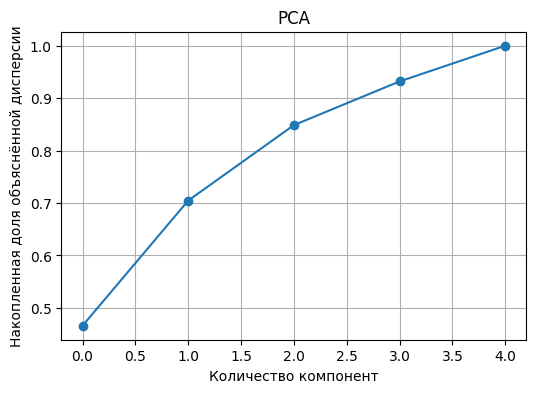

In [122]:
# Визуализируем, как меняется накопленная доля объяснённой дисперсии при увеличении числа компонент
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Количество компонент")
plt.ylabel("Накопленная доля объяснённой дисперсии")
plt.title("PCA")
plt.grid(True)
plt.show()

In [125]:
#Снова обучаем линейную регрессию

X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca, y,
    test_size=0.15,
    random_state=43
)

# обучаем линейную регрессию
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)

# предсказываем и считаем метрики
y_pred = lr_pca.predict(X_test_pca)

mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100   # если в y нет нулей
r2   = r2_score(y_test, y_pred)

metrics_pca_lr = pd.DataFrame(
    {"MAE": mae, "MSE": mse, "RMSE": rmse, "MAPE %": mape, "R²": r2},
    index=["Linear Regression (PCA)"]
).T

display(metrics_pca_lr)

,Linear Regression (PCA)
MAE,5.213908e+03
MSE,4.019526e+07
RMSE,6.339973e+03
MAPE %,1.695594e+01
R²,2.177093e-01


Метод k ближайших соседей

In [128]:
# Импортируем метод k-ближайших соседей из sklearn
from sklearn.neighbors import KNeighborsRegressor

In [129]:
# Создаём объект модели метода ближайших соседей (по умолчанию k=5)
model = KNeighborsRegressor()

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(
            df[features],
            df['PowerConsumption_Zone1'],
            test_size=test_size,
            random_state=random_state
        )
        # Масштабируем признаки — стандартная практика для моделей, основанных на расстоянии (очень важно для KNN)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled  = scaler.transform(X_test)
        # Обучаем модель KNN на обучающих данны
        model.fit(X_train_scaled, y_train)
        # Делаем прогноз на тестовой выборке
        y_pred = model.predict(X_test_scaled)
        # Считаем R² — метрику качества предсказания на тестовой выборке
        r2 = r2_score(y_test, y_pred)
        # Если результат лучше предыдущих — запоминаем параметры
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state


In [130]:
print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.1
Best random state: 313
Best R2 score: 0.46605941323935796


In [131]:
# Делим данные на обучающую и тестовую выборки (90% — для обучения, 10% — для проверки качества)
# random_state=313 — фиксируем разбиение для воспроизводимости результата
X_train, X_test, y_train, y_test = train_test_split(
    df[features],
    df['PowerConsumption_Zone1'],
    test_size=0.1,
    random_state=313
)

X_train, X_test, y_train, y_test = train_test_split(
    df[features],
    df['PowerConsumption_Zone1'],
    test_size=0.1,
    random_state=313
)

# Масштабируем признаки: приводим каждый признак к среднему 0 и стандартному отклонению 1 (это важно для моделей, которые используют расстояния между объектами, например, KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Создаём модель K-ближайших соседей (по умолчанию K=5, но ниже будем подбирать лучшие параметры)
KNNmodel = KNeighborsRegressor()
# Задаём сетку гиперпараметров для перебора:
# Мы перебирали разные значения параметра n_neighbors (от 3 до 9, с шагом 2)
#чтобы подобрать оптимальное количество ближайших соседей для модели KNN. Обычно для небольших выборок и не слишком сложных задач хорошие результаты дают значения от 3 до 9.
# - weights: равные веса ('uniform') или веса, зависящие от расстояния ('distance')
# - p: степень метрики расстояния (p=1 — манхэттенское, p=2 — евклидово)
param_grid = {
    'n_neighbors': range(3, 11, 2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
# GridSearchCV — инструмент для автоматического подбора лучших гиперпараметров модели по кросс-валидации
grid_search = GridSearchCV(
    estimator=KNNmodel,
    param_grid=param_grid,
    scoring='r2',
    cv=5
)
grid_search.fit(X_train_scaled, y_train)
# Получаем лучшие параметры и лучший R² по кросс-валидации
best_r2_score = grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best R2 score (cross-val): {best_r2_score:.4f}")
print(f"Best hyperparameters: {best_params}")
# Оцениваем финальную модель на тестовых данных
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
test_r2 = r2_score(y_test, y_pred)
print(f"R2 score on test set: {test_r2:.4f}")

Best R2 score (cross-val): 0.4674
Best hyperparameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
R2 score on test set: 0.5013


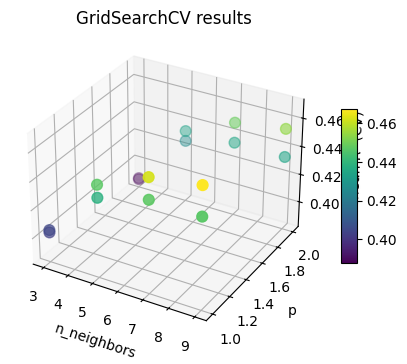

In [132]:
# Сохраняем результаты поиска гиперпараметров в датафрейм
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res["mean_r2"] = cv_res["mean_test_score"]

from mpl_toolkits.mplot3d import Axes3D
# 3D-график: показываем, как меняется средний R² в зависимости от двух параметров: n_neighbors и p
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111, projection='3d')
# количество соседей
xs = cv_res["param_n_neighbors"].astype(int)
# степень метрики (1 или 2)
ys = cv_res["param_p"].astype(int)
# средний R² на кросс-валидации
zs = cv_res["mean_r2"]

scatter = ax.scatter(xs, ys, zs, c=zs, cmap="viridis", s=60)
ax.set_xlabel("n_neighbors")
ax.set_ylabel("p")
ax.set_zlabel("mean R² (CV)")
fig.colorbar(scatter, shrink=0.5, aspect=10)
plt.title("GridSearchCV results")
plt.show()

In [133]:
best_params

{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

Обучим на лучших параметрах модель

In [134]:
# Обучаем модель KNN с лучшими параметрами на НЕМАСШТАБИРОВАННЫХ признаках
KNNmodel = KNeighborsRegressor(**best_params)
KNNmodel.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9, p=1, weights='distance')

In [135]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
y_pred = KNNmodel.predict(X_test)
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100     # (если в y_test нет нулей)
r2   = r2_score(y_test, y_pred)

metrics_knn = pd.DataFrame(
    {"MAE": mae,
     "MSE": mse,
     "RMSE": rmse,
     "MAPE %": mape,
     "R²": r2},
    index=["KNN (best)"]
).T

display(metrics_knn)

,KNN (best)
MAE,3.929610e+03
MSE,2.898531e+07
RMSE,5.383801e+03
MAPE %,1.278021e+01
R²,4.221085e-01
